### 요구사항
- 기본적인 EDA와 전처리를 진행하세요
- t-test를 이용하여 gate_30 그룹과 gate_40 그룹의 플레이 라운드 수의 평균이 같은지, 다른지 검정하세요.
- chi_squre test를 이용하여 version과 retention_1이 서로 독립인지 검정하세요.
- chi_squre test를 이용하여 version과 retention_2이 서로 독립인지 검정하세요.
- 검정 결과를 해석하고, AB 테스트의 결론을 내려보세요.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency


In [10]:
# 1번 자료

df = pd.read_csv('./data/cookie_cats.csv')
df

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


In [ ]:
# 2번 자료

df.shape

In [ ]:
# 3번 자료

df.isnull().sum()

In [ ]:
# 4번 자료

df.nunique()

In [ ]:
# 5번 자료
# version 개별 수 파악

version_count = df['version'].value_counts()

sns.set_style('whitegrid')
version_count.plot(kind='bar')
_=plt.xticks(rotation=0)

In [ ]:
df['sum_gamerounds'].plot(kind='box')

In [ ]:
# 6번 자료
# 진행한 게임 라운드 파악
# 첫 14일

# 전체 범위 파악
df['sum_gamerounds'].sort_values()

# 그래프 그리기
df['sum_gamerounds'].plot(kind='hist',bins=np.arange(0,250,10))


In [12]:
df['retention_1'].value_counts()

retention_1
False    50036
True     40153
Name: count, dtype: int64

In [13]:
df['retention_7'].value_counts()

retention_7
False    73408
True     16781
Name: count, dtype: int64

<Axes: xlabel='retention_7', ylabel='count'>

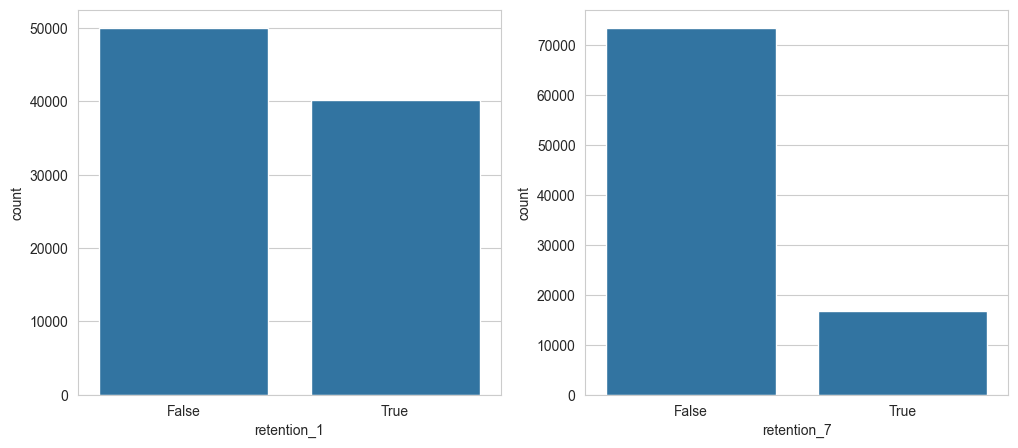

In [28]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(
    data = df,
    x = 'retention_1',
    )

plt.subplot(1,2,2)
sns.countplot(
    data = df,
    x = 'retention_7'
)


T-Test 가설검정

two sample t test


귀무가설 : gate_30과 gate_40의 sum_gamerounds의 평균 점수 차는 0이다

대립가설 : gate_30과 gate_40의 sum_gamerounds의 평균 점수 차는 0보다 크다

In [ ]:
# gate_30 은 0   //   gate_40 은 1  로 바꿔주기
# 종류가 2가지라 label_encoding 필요 없음

# df.loc[df['version'] == 'gate_30','version'] = 0
# df.loc[df['version'] == 'gate_40','version'] = 1
# df['version']

In [109]:
gate_30 = df[df['version'] == 'gate_30'][['sum_gamerounds']]
gate_40 = df[df['version'] == 'gate_40'][['sum_gamerounds']]

In [110]:
test_names = ['sum_gamerounds']

for test_name in test_names:
    statistic,p_value = stats.levene(gate_30[test_name], gate_40[test_name])
    if p_value > 0.05:
        print(f"{test_name} p-value: {p_value}, 등분산 가정 만족")
    else:
        print(f"{test_name} p-value: {p_value}, 이분산 가정 만족")

sum_gamerounds p-value: 0.46694516772623273, 등분산 가정 만족


In [111]:
for test_name in test_names:
    t_statistic,pvalue = stats.ttest_ind(
        a = gate_30[test_name],
        b = gate_40[test_name],
        alternative = 'two-sided',  # 양측검정, 기본적
        equal_var = True
)
    if pvalue<0.05:
        print(test_name,pvalue,'귀무가설 기각')
    else:
        print(test_name,pvalue,'귀무가설 기각 불가')
        

# 귀무가설 기각 불가 ==> 두 집단의 평균 점수는 같다!

sum_gamerounds 0.37290868247405207 귀무가설 기각 불가


카이제곱 테스트


1. retention_1의 경우

2. retention_7의 경우

In [112]:
# 상대도수 분할표 그려보기


retention_1 = pd.crosstab(df['version'],df['retention_1'],margins=True,normalize=True)
retention_1

retention_1,False,True,All
version,,,
gate_30,0.273492,0.222134,0.495626
gate_40,0.281298,0.223076,0.504374
All,0.554790,0.445210,1.000000


In [113]:
chi2_statistics,pvalue,_,_=chi2_contingency(retention_1)

print(f'카이제곱 통계량 : {chi2_statistics}')
print(f'p value : {pvalue}')


# 결론 : 두 집단은 독립이다

카이제곱 통계량 : 3.529214934761564e-05
p value : 0.9999999998443099


In [114]:
retention_7 = pd.crosstab(df['version'],df['retention_7'],margins=True,normalize=True)
retention_7

retention_7,False,True,All
version,,,
gate_30,0.401357,0.094269,0.495626
gate_40,0.412578,0.091796,0.504374
All,0.813935,0.186065,1.000000


In [115]:
chi2_statistics,pvalue,_,_=chi2_contingency(retention_7)

print(f'카이제곱 통계량 : {chi2_statistics}')
print(f'p value : {pvalue}')

카이제곱 통계량 : 0.00011102426380921108
p value : 0.9999999984592586
